## Import libs

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.data import Dataset
import seaborn as sns


from falsb4mpa.modeling.unfair.unfair_lr import UnfairLogisticRegression
from falsb4mpa.dataset.load_data import load_data
from falsb4mpa.evaluation.evaluation import compute_metrics, compute_tradeoff


## Preliminaries

In [2]:
# batch_size = 64
epochs = 100
learning_rate = 0.001

In [3]:
cv_seeds = [13, 29, 42, 55, 73]

## Load data

In [4]:
data_name = 'adult-mpa'

In [5]:
x, y, a = load_data(data_name)
raw_data = (x, y, a)

In [6]:
xdim = x.shape[1]
ydim = y.shape[1]
adim = a.shape[1]
zdim = 8
print(xdim, ydim, adim, zdim)

116 1 10 8


## Result file

In [7]:
header = "model_name", "cv_seed", "clas_acc", "dp", "deqodds", "deqopp", "trade_dp", "trade_deqodds", "trade_deqopp"#, "TN_a0", "FP_a0", "FN_a0", "TP_a0", "TN_a1", "FP_a1", "FN_a1", "TP_a1"
results = []

## Testing

In [8]:
results= []
for cv_seed in cv_seeds:
        x_train, x_test, y_train, y_test, a_train, a_test = train_test_split(
                x, y, a, test_size=0.3, random_state=cv_seed
        )
        y_train = y_train.ravel()
        y_test = y_test.ravel()
        
        model = UnfairLogisticRegression(epochs, learning_rate)
        model.fit(x_train, y_train)
         
        Y_hat = model.predict(x_test)

        clas_acc, dp, deqodds, deqopp, confusion_matrix  = compute_metrics(Y=y_test, A=a_test, Y_hat=Y_hat.reshape(y_test.shape), adim=adim)
        
        fair_metrics = (dp, deqodds, deqopp)
        
        tradeoff = []
        
        for fair_metric in fair_metrics:
                tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
        
        result = ['UnfairLR-decay', cv_seed, clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]]

        results.append(result)
        

> Evaluation
> Class Acc = 0.8391685485839844
> DP | DEqOdds | DEqOpp
> 0.8194665312767029 | 0.86045241355896 | 0.7988427877426147
> Confusion Matrix 
TN: 9429.0 | FP: 780.0 
FN: 1402.0 | TP: 1956.0
> Evaluation
> Class Acc = 0.8376206755638123
> DP | DEqOdds | DEqOpp
> 0.8165420889854431 | 0.8447357416152954 | 0.7680558562278748
> Confusion Matrix 
TN: 9421.0 | FP: 779.0 
FN: 1424.0 | TP: 1943.0
> Evaluation
> Class Acc = 0.8396845459938049
> DP | DEqOdds | DEqOpp
> 0.819894015789032 | 0.8671702146530151 | 0.8136953711509705
> Confusion Matrix 
TN: 9385.0 | FP: 808.0 
FN: 1367.0 | TP: 2007.0
> Evaluation
> Class Acc = 0.835777997970581
> DP | DEqOdds | DEqOpp
> 0.8307046890258789 | 0.8882110118865967 | 0.8571058511734009
> Confusion Matrix 
TN: 9428.0 | FP: 727.0 
FN: 1501.0 | TP: 1911.0
> Evaluation
> Class Acc = 0.8358516693115234
> DP | DEqOdds | DEqOpp
> 0.820120096206665 | 0.8489184379577637 | 0.7734554409980774
> Confusion Matrix 
TN: 9463.0 | FP: 677.0 
FN: 1550.0 | TP: 1877.0


<Axes: >

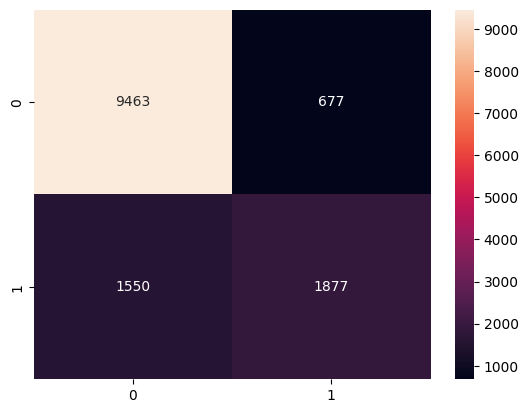

In [9]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

## Saving into DF then CSV

In [10]:
result_df = pd.DataFrame(results, columns=header)
result_df

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp
0,UnfairLR-decay,13,0.839169,0.819467,0.860452,0.798843,0.829201,0.849677,0.818509
1,UnfairLR-decay,29,0.837621,0.816542,0.844736,0.768056,0.826947,0.841163,0.801331
2,UnfairLR-decay,42,0.839685,0.819894,0.867170,0.813695,0.829671,0.853206,0.826486
3,UnfairLR-decay,55,0.835778,0.830705,0.888211,0.857106,0.833234,0.861197,0.846308
4,UnfairLR-decay,73,0.835852,0.820120,0.848918,0.773455,0.827911,0.842334,0.803444


In [11]:
# result_df.to_csv(f'{data_name}-result/unfair_lr-{epochs}.csv')

# Load balanced data

In [12]:
data_name = 'adult-mpa-balanced'

## Testing

In [13]:
results= []
for cv_seed in cv_seeds:
        x_train, x_test, y_train, y_test, a_train, a_test = train_test_split(
                x, y, a, test_size=0.3, random_state=cv_seed
        )
        y_train = y_train.ravel()
        y_test = y_test.ravel()
        
        model = UnfairLogisticRegression(epochs, learning_rate)
        model.fit(x_train, y_train)
         
        Y_hat = model.predict(x_test)

        clas_acc, dp, deqodds, deqopp, confusion_matrix  = compute_metrics(Y=y_test, A=a_test, Y_hat=Y_hat.reshape(y_test.shape), adim=adim)
        
        fair_metrics = (dp, deqodds, deqopp)
        
        tradeoff = []
        
        for fair_metric in fair_metrics:
                tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
        
        result = ['UnfairLR-decay', cv_seed, clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]]

        results.append(result)
        

> Evaluation
> Class Acc = 0.8391685485839844
> DP | DEqOdds | DEqOpp
> 0.8194665312767029 | 0.86045241355896 | 0.7988427877426147
> Confusion Matrix 
TN: 9429.0 | FP: 780.0 
FN: 1402.0 | TP: 1956.0
> Evaluation
> Class Acc = 0.8376206755638123
> DP | DEqOdds | DEqOpp
> 0.8165420889854431 | 0.8447357416152954 | 0.7680558562278748
> Confusion Matrix 
TN: 9421.0 | FP: 779.0 
FN: 1424.0 | TP: 1943.0
> Evaluation
> Class Acc = 0.8396845459938049
> DP | DEqOdds | DEqOpp
> 0.819894015789032 | 0.8671702146530151 | 0.8136953711509705
> Confusion Matrix 
TN: 9385.0 | FP: 808.0 
FN: 1367.0 | TP: 2007.0
> Evaluation
> Class Acc = 0.835777997970581
> DP | DEqOdds | DEqOpp
> 0.8307046890258789 | 0.8882110118865967 | 0.8571058511734009
> Confusion Matrix 
TN: 9428.0 | FP: 727.0 
FN: 1501.0 | TP: 1911.0
> Evaluation
> Class Acc = 0.8358516693115234
> DP | DEqOdds | DEqOpp
> 0.820120096206665 | 0.8489184379577637 | 0.7734554409980774
> Confusion Matrix 
TN: 9463.0 | FP: 677.0 
FN: 1550.0 | TP: 1877.0


<Axes: >

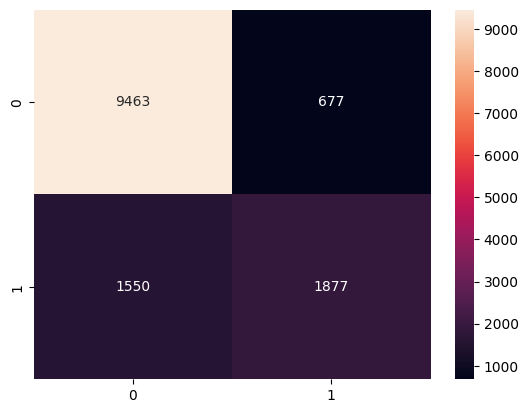

In [14]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

## Saving into DF then CSV

In [15]:
result_df = pd.DataFrame(results, columns=header)
result_df

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp
0,UnfairLR-decay,13,0.839169,0.819467,0.860452,0.798843,0.829201,0.849677,0.818509
1,UnfairLR-decay,29,0.837621,0.816542,0.844736,0.768056,0.826947,0.841163,0.801331
2,UnfairLR-decay,42,0.839685,0.819894,0.867170,0.813695,0.829671,0.853206,0.826486
3,UnfairLR-decay,55,0.835778,0.830705,0.888211,0.857106,0.833234,0.861197,0.846308
4,UnfairLR-decay,73,0.835852,0.820120,0.848918,0.773455,0.827911,0.842334,0.803444


In [16]:
# result_df.to_csv(f'{data_name}-result/unfair_lr-{epochs}.csv')